In [ ]:
from glob import glob
import json
import av
import os
from tqdm import tqdm

with open('../IEMOCAP/labels.json', 'r') as stream:
    labels = json.load(stream)
    
fps_all = {}
frames_all = {}

for DS in tqdm(['train', 'val', 'test']):
    fps_all[DS] = []
    frames_all[DS] = []

    for lbl in tqdm(labels[DS]):

        vidpath = f"../IEMOCAP/raw-videos/{DS}/{lbl}.mp4"
        audpath = f"../IEMOCAP/raw-audios/{DS}/{lbl}.wav"
        txtpath = f"../IEMOCAP/raw-texts/{DS}/{lbl}.json"

        
        container = av.open(vidpath)
        fps_all[DS].append(round(float(container.streams.video[0].average_rate)))
        frames_all[DS].append(container.streams.video[0].frames)
    

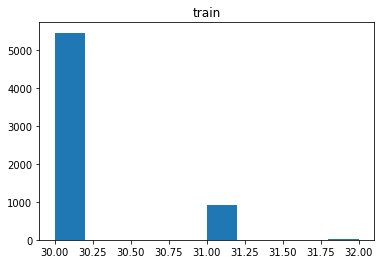

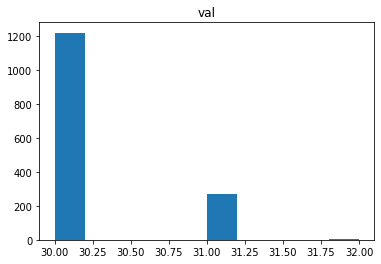

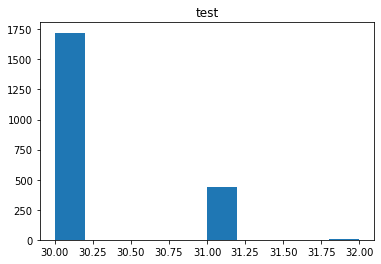

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(fps_all['train'], bins=10);
plt.title('train');

plt.figure()
plt.hist(fps_all['val'], bins=10);
plt.title('val');

plt.figure()
plt.hist(fps_all['test'], bins=10);
plt.title('test');

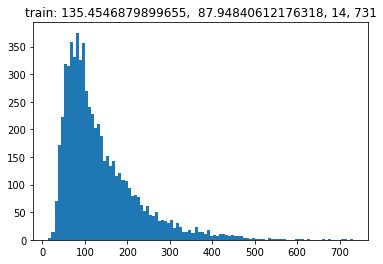

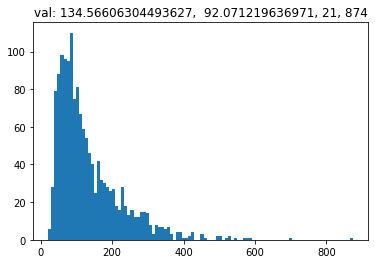

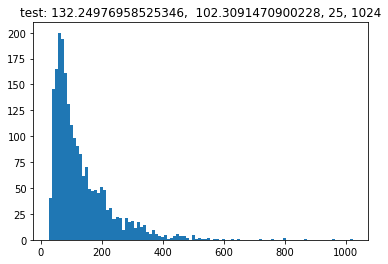

In [33]:
import numpy as np


for DS in ['train', 'val', 'test']:
    plt.figure()
    plt.hist(frames_all[DS], bins=100);
    plt.title(f"{DS}: {np.mean(frames_all[DS])},  {np.std(frames_all[DS])}, {np.min(frames_all[DS])}, {np.max(frames_all[DS])}");

In [40]:
NUM_FRAMES = 16

for DS in ['train', 'val', 'test']:
     print((np.array(frames_all[DS]) < NUM_FRAMES).sum())


1
0
0


In [38]:
np.array(frames_all[DS]) < NUM_FRAMES

array([False, False, False, ..., False, False, False])